## Based on the findings from solar_resource_time_series.ipynb and solar_resource_time_series_2.ipynb, try GARCH.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [62]:
from datetime import datetime

In [4]:
from pandas.plotting import register_matplotlib_converters

plt.style.use("seaborn")
register_matplotlib_converters()

In [50]:
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
#plt.rc("font", family="sans-serif")
#plt.rc("font", size=14)

In [5]:
from agrivoltaics_supply_side_management.solar_irradiation.clearsky import get_clearsky

#### Use minute interval data

In [6]:
varrennes_data = pd.read_csv("../../../data/weather_data/solar_irradiance_20140717_var01.csv",
                             header=[0])

In [7]:
varrennes_data

,Date (yyyy-mm-dd),Timestamp (hh:mm:ss.nnn),G1 (W/m2),G2 (W/m2)
0,2014-07-17,03:46:00.000,0,0
1,2014-07-17,03:47:00.000,0,0
2,2014-07-17,03:48:00.000,0,0
3,2014-07-17,03:49:00.000,0,0
4,2014-07-17,03:50:00.000,0,0
...,...,...,...,...
72669,2014-07-17,20:10:00.000,0,0
72670,2014-07-17,20:11:00.000,0,0
72671,2014-07-17,20:12:00.000,0,0
72672,2014-07-17,20:13:00.000,0,0


In [8]:
varrennes_data['Datetime'] = pd.to_datetime(varrennes_data['Date (yyyy-mm-dd)'] 
                                            + ' ' + varrennes_data['Timestamp (hh:mm:ss.nnn)'])

In [9]:
varrennes_data.set_index('Datetime', inplace=True)

In [10]:
varrennes_data.drop(columns=['Date (yyyy-mm-dd)', 'Timestamp (hh:mm:ss.nnn)'], inplace=True)

#### Since this data set contains within minute data when the difference is significant, take only minute interval data

In [12]:
varrennes_data_by_minite = varrennes_data[(varrennes_data.index.second == 0) & (
    varrennes_data.index.microsecond == 0)]

#### Localize time while taking care of Daylight Saving Time issue.

In [13]:
varrennes_data_by_minite.index = varrennes_data_by_minite.index.tz_localize('Canada/Eastern', 
                                                        ambiguous='NaT', nonexistent='shift_forward')

In [53]:
varrennes_data_by_minite

,G1 (W/m2),G2 (W/m2)
Datetime,,
2014-07-17 03:46:00-04:00,0,0
2014-07-17 03:47:00-04:00,0,0
2014-07-17 03:48:00-04:00,0,0
2014-07-17 03:49:00-04:00,0,0
2014-07-17 03:50:00-04:00,0,0
...,...,...
2014-07-17 20:10:00-04:00,0,0
2014-07-17 20:11:00-04:00,0,0
2014-07-17 20:12:00-04:00,0,0


<AxesSubplot:xlabel='Datetime'>

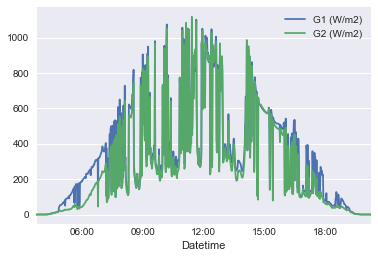

In [14]:
varrennes_data_by_minite.plot()

In [15]:
varrennes_data_ghi_0717 = varrennes_data_by_minite['G1 (W/m2)']

<AxesSubplot:xlabel='Datetime'>

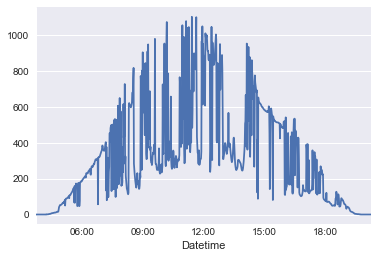

In [16]:
varrennes_data_ghi_0717.plot()

#### Get clearsky data for the same location

In [17]:
varrennes_clearsky_ghi_0717 = get_clearsky(45.616084, -73.386362, 
                                           'Canada/Eastern', varrennes_data_by_minite.index,
                                           location_name='Varrennes, QC, Canada')['ghi']

<AxesSubplot:xlabel='Datetime'>

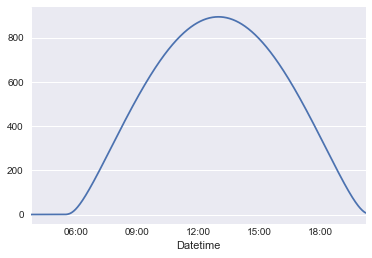

In [18]:
varrennes_clearsky_ghi_0717.plot()

#### Get the difference between observed data and clearsky data

In [19]:
varrennes_data_ghi_residual_0717_1 = varrennes_data_ghi_0717 - varrennes_clearsky_ghi_0717

<AxesSubplot:xlabel='Datetime'>

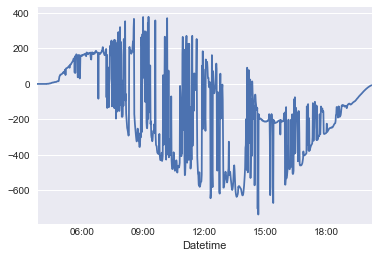

In [20]:
varrennes_data_ghi_residual_0717_1.plot()

#### Take the difference

In [21]:
varrennes_data_ghi_residual_diff_0717_1 = varrennes_data_ghi_residual_0717_1.diff()

In [24]:
varrennes_data_ghi_residual_diff_0717_1

Datetime
2014-07-17 03:46:00-04:00         NaN
2014-07-17 03:47:00-04:00    0.000000
2014-07-17 03:48:00-04:00    0.000000
2014-07-17 03:49:00-04:00    0.000000
2014-07-17 03:50:00-04:00    0.000000
                               ...   
2014-07-17 20:10:00-04:00    1.135207
2014-07-17 20:11:00-04:00    1.077954
2014-07-17 20:12:00-04:00    1.019997
2014-07-17 20:13:00-04:00    0.961480
2014-07-17 20:14:00-04:00    0.902568
Length: 989, dtype: float64

<AxesSubplot:xlabel='Datetime'>

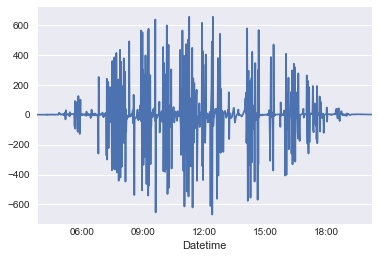

In [22]:
varrennes_data_ghi_residual_diff_0717_1.plot()

In [25]:
varrennes_data_ghi_residual_diff_0717_1.dropna(inplace=True)

In [26]:
varrennes_data_ghi_residual_diff_0717_1

Datetime
2014-07-17 03:47:00-04:00    0.000000
2014-07-17 03:48:00-04:00    0.000000
2014-07-17 03:49:00-04:00    0.000000
2014-07-17 03:50:00-04:00    0.000000
2014-07-17 03:51:00-04:00    0.000000
                               ...   
2014-07-17 20:10:00-04:00    1.135207
2014-07-17 20:11:00-04:00    1.077954
2014-07-17 20:12:00-04:00    1.019997
2014-07-17 20:13:00-04:00    0.961480
2014-07-17 20:14:00-04:00    0.902568
Length: 988, dtype: float64

<AxesSubplot:xlabel='Datetime'>

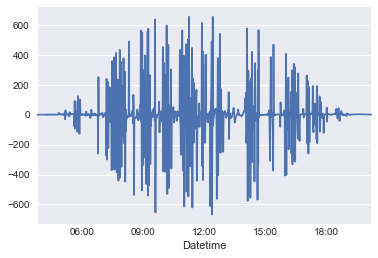

In [27]:
varrennes_data_ghi_residual_diff_0717_1.plot()

#### PACF plot

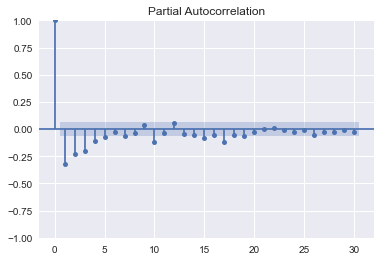

In [29]:
plot_pacf(varrennes_data_ghi_residual_diff_0717_1);

#### ACF plot

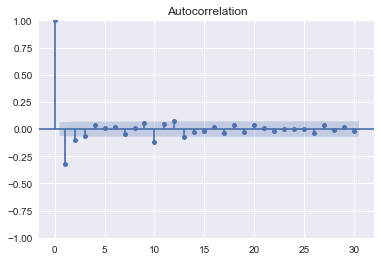

In [31]:
plot_acf(varrennes_data_ghi_residual_diff_0717_1);

#### PACF of squared data (GARCH seems to be based on squared data)

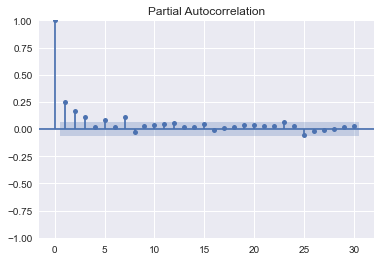

In [32]:
plot_pacf(varrennes_data_ghi_residual_diff_0717_1 ** 2);

#### ACF of squared data (GARCH seems to be based on squared data)

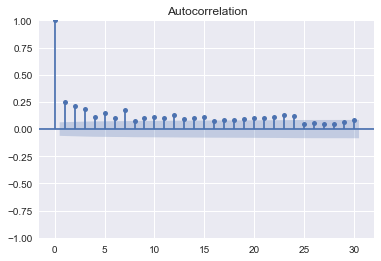

In [34]:
plot_acf(varrennes_data_ghi_residual_diff_0717_1 ** 2);

#### Based on TABLE 3.2 of [8] (See README), it seems that both ACF and PACF have damped exponential/sine wave, tail off. Hence, ARMA model. From PACF of squared data, p seems to be 3. From ACF of squared data, q seems to be 3. 

#### Fit GARCH model

In [35]:
model = arch_model(varrennes_data_ghi_residual_diff_0717_1, p=3, q=3)

In [38]:
model_fit_result = model.fit()

/Users/tadatoshi/Documents/development/projects/tadatoshi_solar_research_society/agrivoltaics_supply_side_management/venv/lib/python3.10/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.444e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:     10,   Neg. LLF: 9564.844661810755
Iteration:      2,   Func. Count:     21,   Neg. LLF: 6095.61941789857
Iteration:      3,   Func. Count:     31,   Neg. LLF: 5994.785234755356
Iteration:      4,   Func. Count:     41,   Neg. LLF: 6038.848772213035
Iteration:      5,   Func. Count:     51,   Neg. LLF: 5949.288497833442
Iteration:      6,   Func. Count:     60,   Neg. LLF: 5943.473382893762
Iteration:      7,   Func. Count:     69,   Neg. LLF: 5942.947658662074
Iteration:      8,   Func. Count:     78,   Neg. LLF: 5942.884794792126
Iteration:      9,   Func. Count:     87,   Neg. LLF: 5942.818889368125
Iteration:     10,   Func. Count:     96,   Neg. LLF: 5942.749453188742
Iteration:     11,   Func. Count:    105,   Neg. LLF: 5942.541990264181
Iteration:     12,   Func. Count:    114,   Neg. LLF: 5942.1193159266495
Iteration:     13,   Func. Count:    123,   Neg. LLF: 5941.050432960227
Iteration:     14,   Func. Count:    132,   Neg. LLF: 5938.43512

In [39]:
model_fit_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5733.17
Distribution:                  Normal   AIC:                           11482.3
Method:            Maximum Likelihood   BIC:                           11521.5
                                        No. Observations:                  988
Date:                Mon, Dec 05 2022   Df Residuals:                      987
Time:                        17:40:35   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0210      0.314  6.695e-02      0.947 [ -0.595,  0.637]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.4349      0.625      0.696      0.486      [ -0.789,  1.659]
alpha[1]       0.0601  1.860e-02      3.232  1.230e-03  [2.365e-02,9.654e-02]
alpha[2]       0.0921  2.434e-02      3.784  1.545e-04    [4.438e-02,  0.140]
alpha[3]   1.3284e-09  2.625e-02  5.060e-08      1.000 [-5.145e-02,5.145e-02]
beta[1]    7.6645e-10  3.682e-02  2.081e-08      1.000 [-7.217e-02,7.217e-02]
beta[2]    6.6822e-10  3.665e-02  1.823e-08      1.000 [-7.183e-02,7.183e-02]
beta[3]        0.8478  2.607e-02     32.522 5.129e-232      [  0.797,  0.899]
=============================================================================

Covariance estimator: robust
"""

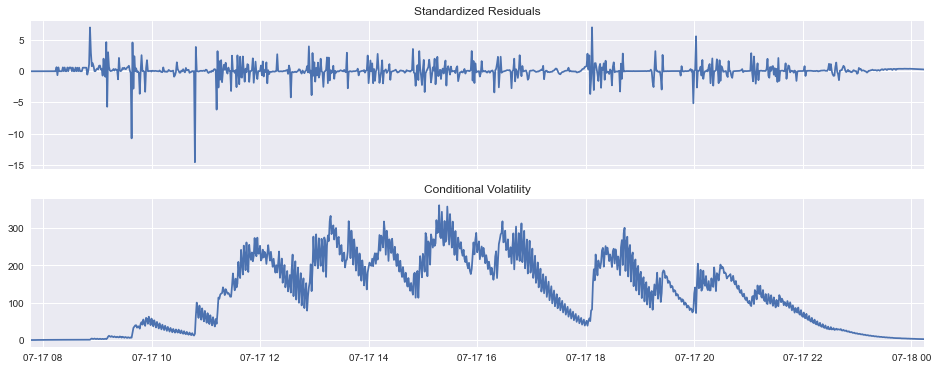

In [51]:
fig = model_fit_result.plot()

#### Since model.fit() shows a warning, "DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when estimating the model parameters. The scale of y is 2.444e+04. Parameter estimation work better when this value is between 1 and 1000. The recommended rescaling is 0.1 * y.", use pct_change as examples for ARCH are using. 

In [47]:
varrennes_data_ghi_residual_pct_change_0717_1 = \
    100 * varrennes_data_ghi_residual_0717_1.pct_change().dropna()

In [48]:
varrennes_data_ghi_residual_pct_change_0717_1

Datetime
2014-07-17 04:15:00-04:00           inf
2014-07-17 04:16:00-04:00   -100.000000
2014-07-17 04:17:00-04:00           inf
2014-07-17 04:18:00-04:00      0.000000
2014-07-17 04:19:00-04:00      0.000000
                                ...    
2014-07-17 20:10:00-04:00     -9.102583
2014-07-17 20:11:00-04:00     -9.509072
2014-07-17 20:12:00-04:00     -9.943329
2014-07-17 20:13:00-04:00    -10.407758
2014-07-17 20:14:00-04:00    -10.905016
Length: 960, dtype: float64

<AxesSubplot:xlabel='Datetime'>

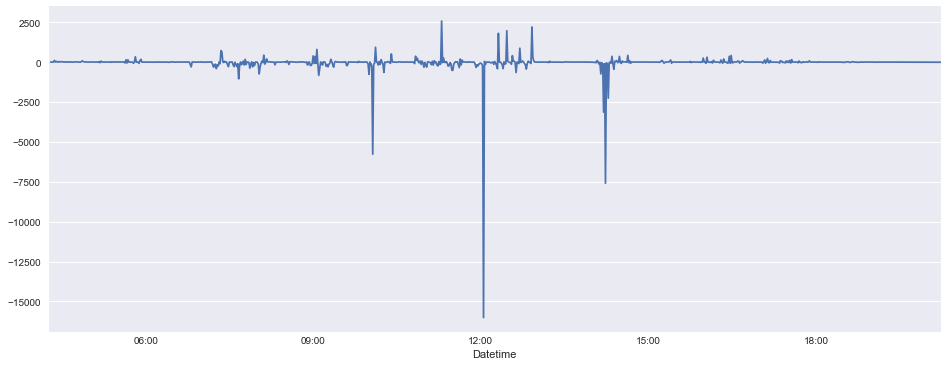

In [52]:
varrennes_data_ghi_residual_pct_change_0717_1.plot()

#### Doesn't look good. Decided not to use pct_change

### Forecasting
##### Based on https://arch.readthedocs.io/en/latest/univariate/forecasting.html

In [63]:
start_time = datetime(2014, 7, 17, 3, 47, 0)

In [64]:
start_time

datetime.datetime(2014, 7, 17, 3, 47)

#### Analytical Forecasts

In [65]:
analytical_forecasts = model_fit_result.forecast(
    start=start_time, reindex=False)

<AxesSubplot:xlabel='Datetime'>

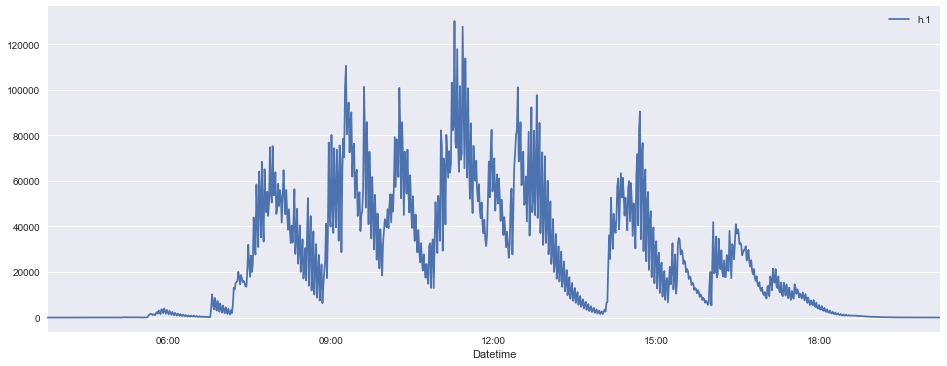

In [66]:
analytical_forecasts.variance.plot()

<AxesSubplot:xlabel='Datetime'>

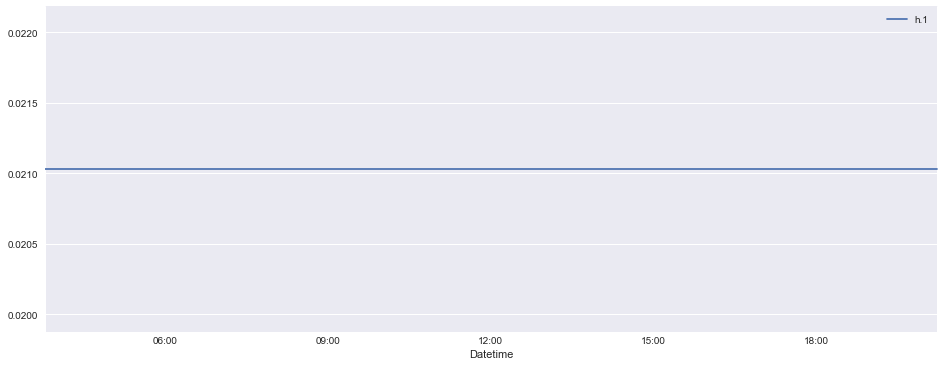

In [67]:
analytical_forecasts.mean.plot()

<AxesSubplot:xlabel='Datetime'>

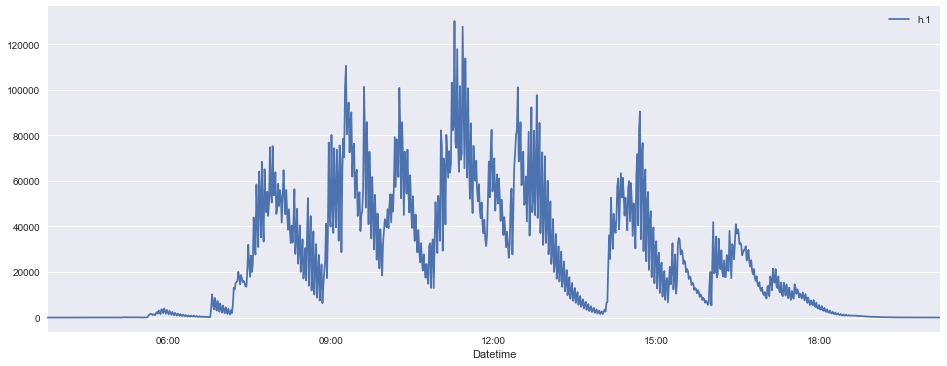

In [68]:
analytical_forecasts.residual_variance.plot()